Author: ttsiapras\
Disparity extraction Methods

In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from ipywidgets import FloatSlider
import ipywidgets as widgets

## Example with a known sample from https://vision.middlebury.edu/stereo/data/

In [2]:
R1 = r"C:\Users\user1\Desktop\StereoB2.png"
R2 = r"C:\Users\user1\Documents\Repositories\Arma3DatasetGen\stereo\images\right\right (4).png"
L0 = r"C:\Users\user1\Documents\Repositories\Arma3DatasetGen\stereo\images\left\left (4).png"
# "C:\Users\user1\Desktop\SteroB3.png"
# "C:\Users\user1\Desktop\StereoB1.png"
# "C:\Users\user1\Desktop\StereoB2.png"
imageL = cv.imread(L0,0)
imageR = cv.imread(R2,0)


# r = cv.selectROI("select the area", imageL)
# cv.destroyAllWindows()


**These datasets of piecewise planar scenes were created by Daniel Scharstein, Padma Ugbabe, and Rick Szeliski. Each set contains 9 images (im0.ppm - im8.ppm) and ground-truth disparity maps for images 2 and 6 (disp2.pgm and disp6.pgm). Each ground-truth disparity map is scaled by a factor of 8. For example, a value of 100 in disp2.pgm means that the corresponding pixel in im6.ppm is 12.5 pixels to the left**

## Stereo SGBM

In [ ]:
disparity_SGBM = []
disparity_SGBM_vis = []

def SGBM_interactive(block_size,max_disp,uniquenessRatio,speckleWindowSize,speckleRange,disp12MaxDiff=0):
    global disparity_SGBM
    global disparity_SGBM_vis
    # Matched block size. It must be an odd number >=1 . Normally, it should be somewhere in the 3..11 range.
    #block_size = 4

    min_disp = -max_disp
    #max_disp = -min_disp
    # Maximum disparity minus minimum disparity. The value is always greater than zero.
    # In the current implementation, this parameter must be divisible by 16.
    num_disp = max_disp - min_disp

    # Margin in percentage by which the best (minimum) computed cost function value should "win" the second best value to consider the found match correct.
    # Normally, a value within the 5-15 range is good enough
    #uniquenessRatio = 5

    # Maximum size of smooth disparity regions to consider their noise speckles and invalidate.
    # Set it to 0 to disable speckle filtering. Otherwise, set it somewhere in the 50-200 range.
    #speckleWindowSize = 50

    # Maximum disparity variation within each connected component.
    # If you do speckle filtering, set the parameter to a positive value, it will be implicitly multiplied by 16.
    # Normally, 1 or 2 is good enough.
    #speckleRange = 3
    #disp12MaxDiff = 0

    stereo = cv.StereoSGBM_create(
        minDisparity=min_disp,
        numDisparities=num_disp,
        blockSize=block_size,
        uniquenessRatio=uniquenessRatio,
        speckleWindowSize=speckleWindowSize,
        speckleRange=speckleRange,
        disp12MaxDiff=disp12MaxDiff,
        P1=8 * 1 * block_size * block_size,
        P2=32 * 1 * block_size * block_size,
        mode=cv.STEREO_SGBM_MODE_SGBM_3WAY
    )
    disparity_SGBM = stereo.compute(imageL,imageR)

    # Normalize the values to a range from 0..255 for a grayscale image
    disparity_SGBM_vis = cv.normalize(np.copy(disparity_SGBM), np.copy(disparity_SGBM), alpha=255,
                                  beta=0, norm_type=cv.NORM_MINMAX)
    disparity_SGBM_vis = np.uint8(disparity_SGBM_vis)
    
    #minDisp = disparity_SGBM.mean()-disparity_SGBM.std()
    plt.figure(figsize=(20,16))
    plt.imshow(disparity_SGBM_vis,cmap="gray")
    plt.axis('off')
    plt.show()
    #print(disparity_SGBM.shape)
    #print(int(disparity_SGBM[s_pt[0]:e_pt[0],s_pt[1]:e_pt[1]].mean())/16)
    #cv.imwrite("disparity_SGBM_norm.png", disparity_SGBM)
    return()

def SGBM(imageL,imageR,block_size=11,max_disp=32,uniquenessRatio=10,speckleWindowSize=110,speckleRange=5,disp12MaxDiff=0):
    global disparity_SGBM
    global disparity_SGBM_vis
    # Matched block size. It must be an odd number >=1 . Normally, it should be somewhere in the 3..11 range.
    #block_size = 4

    min_disp = -max_disp
    #max_disp = -min_disp
    # Maximum disparity minus minimum disparity. The value is always greater than zero.
    # In the current implementation, this parameter must be divisible by 16.
    num_disp = max_disp - min_disp

    # Margin in percentage by which the best (minimum) computed cost function value should "win" the second best value to consider the found match correct.
    # Normally, a value within the 5-15 range is good enough
    #uniquenessRatio = 5

    # Maximum size of smooth disparity regions to consider their noise speckles and invalidate.
    # Set it to 0 to disable speckle filtering. Otherwise, set it somewhere in the 50-200 range.
    #speckleWindowSize = 50

    # Maximum disparity variation within each connected component.
    # If you do speckle filtering, set the parameter to a positive value, it will be implicitly multiplied by 16.
    # Normally, 1 or 2 is good enough.
    #speckleRange = 3
    #disp12MaxDiff = 0

    stereo = cv.StereoSGBM_create(
        minDisparity=min_disp,
        numDisparities=num_disp,
        blockSize=block_size,
        uniquenessRatio=uniquenessRatio,
        speckleWindowSize=speckleWindowSize,
        speckleRange=speckleRange,
        disp12MaxDiff=disp12MaxDiff,
        P1=8 * 1 * block_size * block_size,
        P2=32 * 1 * block_size * block_size,
        mode=cv.STEREO_SGBM_MODE_SGBM_3WAY
    )
    disparity_SGBM = stereo.compute(imageL,imageR)

    return(disparity_SGBM)

In [87]:
#imageL = images[2]
#imageR = images[6]
#import ipywidgets as widgets
%matplotlib inline
interact(SGBM_interactive, block_size=(1,21,2), max_disp=(16,64,16),uniquenessRatio=(1,20,1),speckleWindowSize=(20,200,10),speckleRange=(1,10,1),disp12MaxDiff=(0,100,1));


interactive(children=(IntSlider(value=11, description='block_size', max=21, min=1, step=2), IntSlider(value=32…

## Stereo BM

In [20]:
BM_disparity = []
def BM_interactive(numDisparities=16,blocksize=5,uniquenessRatio=1):
    global BM_disparity
    stereo = cv.StereoBM_create(numDisparities=numDisparities, blockSize=blocksize)
    stereo.setUniquenessRatio(uniquenessRatio)
    
    BM_disparity = stereo.compute(imageL,imageR)
    plt.figure(figsize=(20,16))
    plt.imshow(BM_disparity,cmap="gray")
    plt.axis('off')
    plt.show()
    return()

def BM(numDisparities=16,blocksize=9,uniquenessRatio=20):
    stereo = cv.StereoBM_create(numDisparities=numDisparities, blockSize=blocksize)
    stereo.setUniquenessRatio(uniquenessRatio)
    BM_disparity = stereo.compute(imageL,imageR)
    return BM_disparity

In [21]:
interact(BM_interactive,numDisparities=(16,160,16), blocksize=(5,100,2),uniquenessRatio=(1,20,1))

interactive(children=(IntSlider(value=16, description='numDisparities', max=160, min=16, step=16), IntSlider(v…

<function __main__.BM_interactive(numDisparities=16, blocksize=5, uniquenessRatio=1)>

### STEREO SGBM with postprocessing

In [7]:
SGBMp_raw = []
SGBMp_vis = []
def SGBM_plus(block_size,
         max_disp,
         uniquenessRatio,
         speckleWindowSize,
         speckleRange,
         disp12MaxDiff=0,
         l=80000,sigma=1.2,vis_mul=1.0):
    global SGBMp_raw,SGBMp_vis
    # Matched block size. It must be an odd number >=1 . Normally, it should be somewhere in the 3..11 range.
    #block_size = 4

    min_disp = -max_disp
    #max_disp = -min_disp
    # Maximum disparity minus minimum disparity. The value is always greater than zero.
    # In the current implementation, this parameter must be divisible by 16.
    num_disp = max_disp - min_disp

    # Margin in percentage by which the best (minimum) computed cost function value should "win" the second best value to consider the found match correct.
    # Normally, a value within the 5-15 range is good enough
    #uniquenessRatio = 5

    # Maximum size of smooth disparity regions to consider their noise speckles and invalidate.
    # Set it to 0 to disable speckle filtering. Otherwise, set it somewhere in the 50-200 range.
    #speckleWindowSize = 50

    # Maximum disparity variation within each connected component.
    # If you do speckle filtering, set the parameter to a positive value, it will be implicitly multiplied by 16.
    # Normally, 1 or 2 is good enough.
    #speckleRange = 3
    #disp12MaxDiff = 0

    left_matcher = cv.StereoSGBM_create(
        minDisparity=min_disp,
        numDisparities=num_disp,
        blockSize=block_size,
        uniquenessRatio=uniquenessRatio,
        speckleWindowSize=speckleWindowSize,
        speckleRange=speckleRange,
        disp12MaxDiff=disp12MaxDiff,
        P1=8 * 1 * block_size * block_size,
        P2=32 * 1 * block_size * block_size,
    )
    right_matcher = cv.ximgproc.createRightMatcher(left_matcher)
    
    # FILTER Parameters
    lmbda = l
    sigma = sigma
    visual_multiplier = vis_mul
 
    wls_filter = cv.ximgproc.createDisparityWLSFilter(matcher_left=left_matcher)
    wls_filter.setLambda(lmbda)
    wls_filter.setSigmaColor(sigma)
    
    displ = left_matcher.compute(imageL, imageR)  # .astype(np.float32)/16
    dispr = right_matcher.compute(imageR, imageL)

    print(displ.min(),displ.max())
    displ = np.int16(displ)
    dispr = np.int16(dispr)
    print(displ.min(),displ.max())
    
    SGBMp_raw = wls_filter.filter(displ, imageL, None, dispr)
    data = SGBMp_raw.flatten()
    temp = data[abs(data - np.mean(data)) < 4 * np.std(data)]
    low = temp.min()
    high= temp.max()
    SGBMp_raw = np.clip(SGBMp_raw,low,high)
    #plt.figure(figsize=(20,16)); plt.imshow(SGBMp_raw,cmap="inferno")

    SGBMp_vis = np.copy(SGBMp_raw)
    SGBMp_vis = cv.normalize(src=SGBMp_vis, dst=SGBMp_vis, beta=0,alpha=255, norm_type=cv.NORM_MINMAX);
    SGBMp_vis = np.uint8(SGBMp_vis)
    # Normalize the values to a range from 0..255 for a grayscale image
    plt.figure(figsize=(20,16))
    plt.imshow(SGBMp_vis,cmap="inferno")
    plt.show()
    return(1)

In [84]:
%matplotlib inline
interact(SGBM_plus, block_size=(1,11,2), max_disp=(16,128,16), uniquenessRatio=(1,20,1), speckleWindowSize=(20,200,10),speckleRange=(1,10,1),disp12MaxDiff=(0,100,1),l=(80000-10000,80000+10000,1000),sigma=(0.5,1.5,0.1),vis_mul=(0.1,2,0.1));

interactive(children=(IntSlider(value=5, description='block_size', max=11, min=1, step=2), IntSlider(value=64,…

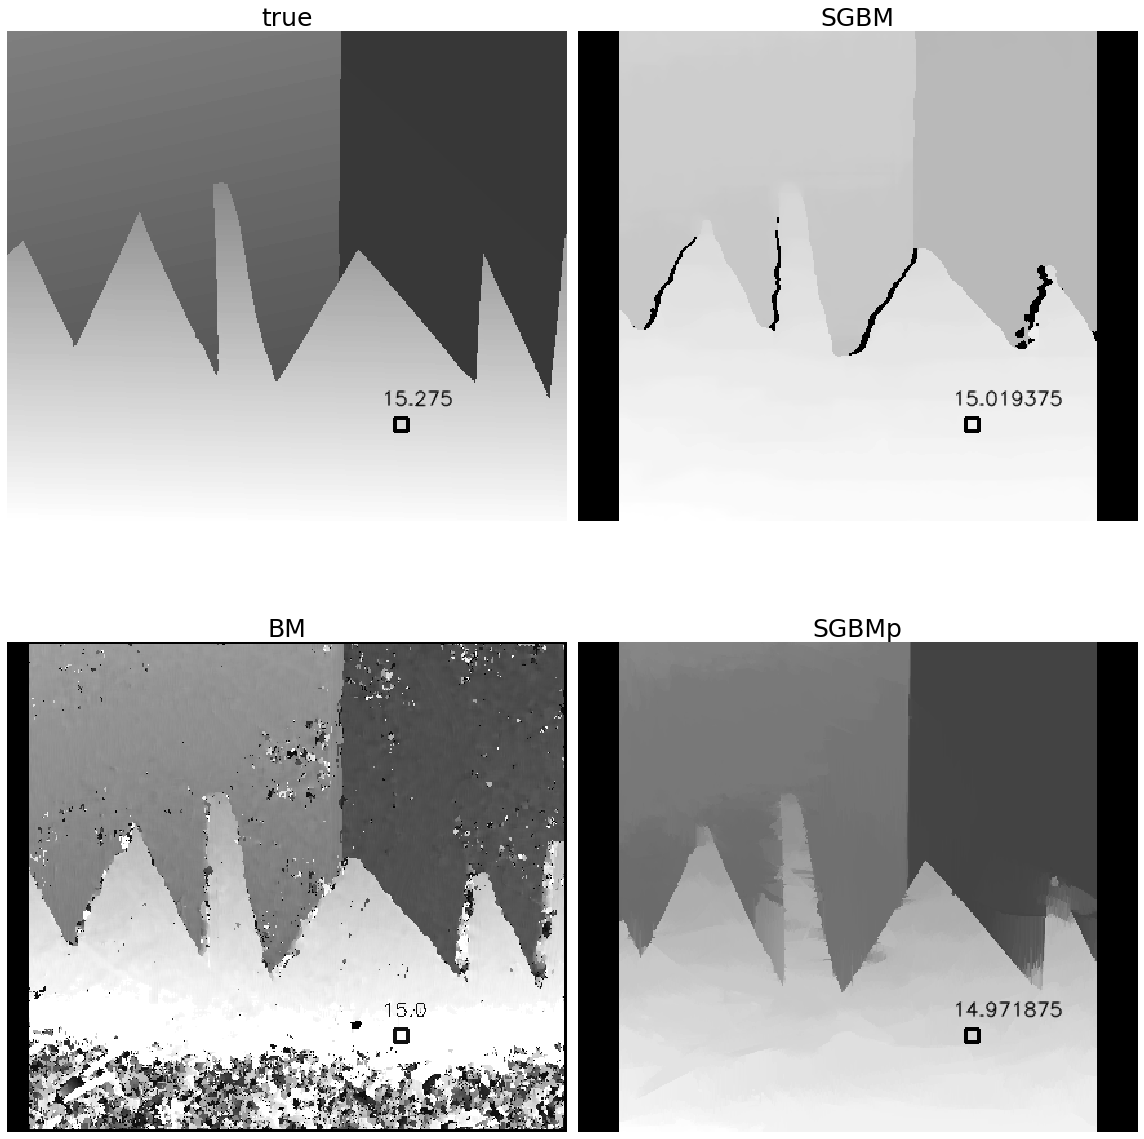

In [11]:
with_rect = cv.rectangle(np.copy(disparity_SGBM_vis),s_pt,e_pt,(0,0,0),2)
roi_disp = disparity_SGBM[s_pt[1]:e_pt[1],s_pt[0]:e_pt[0]].mean()/16
with_rect_SGBM = cv.putText(with_rect, str(roi_disp),t_pt,
                            cv.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1,cv.LINE_AA)
with_rect = cv.rectangle(np.copy(BM_disparity),s_pt,e_pt,(0,0,0),2)
roi_disp = BM_disparity[s_pt[1]:e_pt[1],s_pt[0]:e_pt[0]].mean()/16
with_rect_BM = cv.putText(with_rect, str(roi_disp), t_pt, 
                       cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)
with_rect = cv.rectangle(np.copy(SGBMp_vis),s_pt,e_pt,(0,0,0),2)
roi_disp = SGBMp_raw[s_pt[1]:e_pt[1],s_pt[0]:e_pt[0]].mean()/16
with_rect_SGBMp = cv.putText(with_rect, str(roi_disp), t_pt, 
                       cv.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv.LINE_AA)

fig = plt.figure(figsize=(16,18))
fig.add_subplot(2,2,1)
plt.imshow(with_rect_true,cmap='gray'); plt.axis('off'); plt.title("true",fontsize=25)
fig.add_subplot(2,2,2)
plt.imshow(with_rect_SGBM,cmap='gray'); plt.axis('off'); plt.title("SGBM",fontsize=25)
fig.add_subplot(2,2,3)
plt.imshow(with_rect_BM,cmap='gray'); plt.axis('off'); plt.title("BM",fontsize=25)
fig.add_subplot(2,2,4)
plt.imshow(with_rect_SGBMp,cmap='gray'); plt.axis('off'); plt.title("SGBMp",fontsize=25)

plt.tight_layout()

In [92]:
import cv2
import numpy as np

# --- Load the image ---
image_path = L0
image = cv2.imread(image_path)
output = image.copy()

rois = []

print("Select ROIs (press ENTER or SPACE after each selection, ESC when done)")

# --- Let user select multiple ROIs ---
while True:
    r = cv2.selectROI("Select ROI (ESC to quit)", image, fromCenter=False, showCrosshair=True)
    x, y, w, h = r
    if w == 0 or h == 0:
        break  # No selection, exit
    rois.append(r)

cv2.destroyAllWindows()

# --- Process each ROI ---
#disparityMap = BM(numDisparities=64,blocksize=9,uniquenessRatio=20)
disparityMap = SGBM(imageL,imageR,block_size=5,max_disp=16,uniquenessRatio=4,speckleWindowSize=110,speckleRange=5,disp12MaxDiff=0)
for idx, (x, y, w, h) in enumerate(rois):
    roi = disparityMap[y:y+h, x:x+w]

    # Compute mean color
    mean_val = np.percentile(roi, 75)#roi.mean()
    mean_val = round(mean_val, 2)

    disparityMa = cv2.GaussianBlur(disparityMap,(5,5),2)
    m = 0
    M = 150
    clipped = np.clip(disparityMap,a_min=m,a_max=M)
    mornal  = cv2.normalize(clipped, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Draw rectangle
    cv2.rectangle(output, (x, y), (x + w, y + h), (255, 255, 255), 1)

    # Put text below rectangle
    text = f"{mean_val}"
    text_position = (x, y + h + 20)
    cv2.putText(output, text, text_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# --- Show and save result ---
cv2.imshow("Result", output)
cv2.imwrite('output_with_means.png', output)
cv2.waitKey(0)
cv2.destroyAllWindows()


Select ROIs (press ENTER or SPACE after each selection, ESC when done)


In [71]:
disparityMap = BM(numDisparities=64,blocksize=9,uniquenessRatio=10)
disparityMa = cv2.GaussianBlur(disparityMap,(5,5),2)
m = 0
M = 150
clipped = np.clip(disparityMap,a_min=m,a_max=M)
mornal  = cv2.normalize(clipped, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
cv2.imshow("Result", mornal.astype('u1'))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [90]:
import cv2
import glob
import os


def BM(imageL,imageR,numDisparities=16,blocksize=9,uniquenessRatio=20):
    stereo = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blocksize)
    stereo.setUniquenessRatio(uniquenessRatio)
    BM_disparity = stereo.compute(imageL,imageR)
    return BM_disparity

# Paths to folders
left_folder = 'images/left/'
right_folder = 'images/right/'

# Get sorted list of image files
left_images = sorted(glob.glob(os.path.join(left_folder, '*.png')))
right_images = sorted(glob.glob(os.path.join(right_folder, '*.png')))

# Check if the number of files match
if len(left_images) != len(right_images):
    print(f"Warning: {len(left_images)} left images and {len(right_images)} right images!")

# Loop through pairs
for left_path, right_path in zip(left_images, right_images):
    # Read images
    img_left = cv2.imread(left_path,0)
    img_right = cv2.imread(right_path,0)

    disparityMap = SGBM(img_left,img_right,block_size=5,max_disp=16,uniquenessRatio=4,speckleWindowSize=110,speckleRange=5,disp12MaxDiff=0)
    #disparityMap = BM(img_left,img_right,numDisparities=64,blocksize=5,uniquenessRatio=50)

    disparityMap = cv2.GaussianBlur(disparityMap,(5,5),2)
    m = 0
    M = 200
    clipped = np.clip(disparityMap,a_min=m,a_max=M)
    normal  = cv2.normalize(clipped, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    normal  =normal.astype('u1')

    # You can now process the pair!
    print(f"Processing {os.path.basename(left_path)} and {os.path.basename(right_path)}")

    # Example: Show the pair
    cv2.imshow('Left', img_left)
    cv2.imshow('Dist', normal)
    if cv2.waitKey(50) == 27:  # Press ESC to exit
        break

cv2.destroyAllWindows()


Processing left (1).png and right (1).png
Processing left (10).png and right (10).png
Processing left (100).png and right (100).png
Processing left (101).png and right (101).png
Processing left (102).png and right (102).png
Processing left (103).png and right (103).png
Processing left (104).png and right (104).png
Processing left (105).png and right (105).png
Processing left (106).png and right (106).png
Processing left (107).png and right (107).png
Processing left (108).png and right (108).png
Processing left (109).png and right (109).png
Processing left (11).png and right (11).png
Processing left (110).png and right (110).png
Processing left (111).png and right (111).png
Processing left (112).png and right (112).png
Processing left (113).png and right (113).png
Processing left (114).png and right (114).png
Processing left (115).png and right (115).png
Processing left (116).png and right (116).png
Processing left (117).png and right (117).png
Processing left (118).png and right (118).

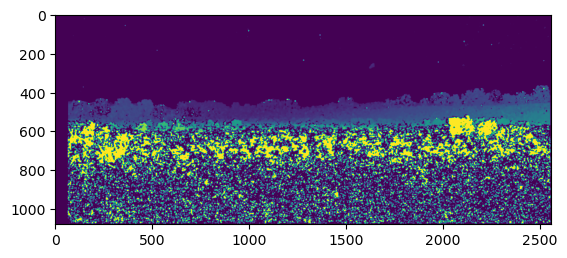

In [76]:
plt.imshow(mornal);plt.show()